In [4]:
import tensorflow as tf
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\alex\Anaconda3\envs\tf\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


# Intro
SGD - Stohastic <>
sdsd
sd

# Data

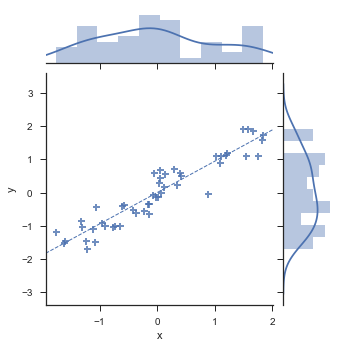

In [19]:
def generate_data(intercept=2, slope=0.8, n=50, normalize=False):
    np.random.seed(997)
    x = np.random.uniform(low=-1, high=1, size=n)
    noise_scale = (x.max()-x.min()) / 10
    noise = np.random.normal(loc=0, scale=noise_scale, size=n)
    y = intercept + slope*x + noise
    # normalization #
    if normalize:
        norm = lambda vec: (vec - vec.mean()) / vec.std()
        x, y = norm(x), norm(y)
    return x, y
x, y = generate_data(normalize=True) 
data_df = pd.DataFrame({'x':x, 'y':y})

# data visualisation
sns.set(style="ticks")
g = sns.JointGrid(x='x', y='y', data=data_df, size=5, ratio=4)
_ = g.plot_joint(sns.regplot, marker='P', ci=None, line_kws={'ls':'--', 'lw':1})
_ = g.plot_marginals(sns.distplot, bins=10)

# SGD with TF

In [16]:
def sgd_solution (x_data, y_data, n_iter, learning_rate, print_st=1):
    # slope and intercept initial value
    init_val = -2.0
    b_0 = tf.Variable(init_val, tf.float32)
    b_1 = tf.Variable(init_val, tf.float32)
    
    # Linear Model definition
    x = tf.placeholder(tf.float32)
    y = tf.placeholder(tf.float32)
    lm = b_0 + b_1*x
    
    # SSE loss  - the same metric as Linear Regression use 
    # SSE(p_predicted , y)
    sse_loss = tf.reduce_sum(tf.square(lm-y))
    # optimizer
    opt = tf.train.GradientDescentOptimizer(learning_rate)
    # opt = tf.train.AdagradOptimizer(learning_rate)   # possible to use different GD variations
    # opt = tf.train.AdamOptimizer(learning_rate)
    train = opt.minimize(sse_loss)
    
    # training #
    init = tf.global_variables_initializer()
    sess = tf.Session()
    sess.run(init)
    ans = []  # intermidiate values of estimated b0, b1 and SSE value
    ans.append(sess.run([b_0, b_1, sse_loss], {x:x_data, y:y_data})) # initial values
    # perform SGD iterations 
    for i in range(n_iter):
        sess.run(train, {x:x_data, y:x_data})
        if i%print_st==0:
            ans_i = sess.run([b_0, b_1, sse_loss], {x:x_data, y:y_data})
            print('\niter %d' %i)
            print('b0=%.3f  b1=%.3f  sse=%.3f' %(ans_i[0], ans_i[1], ans_i[2]))
            ans.append(ans_i)
    return ans

In [14]:
sgd_results = sgd_solution(x, y, n_iter=10, learning_rate=0.008, print_st=1)


iter 0
b0=-0.400  b1=0.400  sse=28.060

iter 1
b0=-0.080  b1=0.880  sse=5.571

iter 2
b0=-0.016  b1=0.976  sse=5.067

iter 3
b0=-0.003  b1=0.995  sse=5.126

iter 4
b0=-0.001  b1=0.999  sse=5.144

iter 5
b0=-0.000  b1=1.000  sse=5.148

iter 6
b0=-0.000  b1=1.000  sse=5.149

iter 7
b0=-0.000  b1=1.000  sse=5.149

iter 8
b0=-0.000  b1=1.000  sse=5.149

iter 9
b0=-0.000  b1=1.000  sse=5.149
